<a href="https://colab.research.google.com/github/gaussssss/machinelearning-tpe/blob/main/Optimizing_Neural_Networks_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>NoteBook de TPE d'apprentissage artificiel UY I Niveau 3 Info 2021/2022</h1>

<h3>Liste des membres du TPE</h3>
<ul>
  <li>MOMENE TIYA Florian <strong>21S2785</strong></li>
  <li>TEIDA NOUTSA Remi Raoul <strong>19M2447</strong></li>
  <li>MBOCK NYENGUE Anne Claude <strong>19M2211</strong></li>
  <li>EKOH FOUAPON NJIKAM Yvan <strong>19M2198</strong></li>
</ul>
<br>
<strong><i>Par Dr. Melatagia</i></strong>

In [ ]:
%pylab inline
import os
import numpy as np
import pandas as pd
from imageio import imread
from sklearn.metrics import accuracy_score
from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm
import keras
# import keras modules

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer

# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)
drive.mount('/content/drive')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imread', 'seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mnist recognition/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mnist recognition/test.csv')

sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mnist recognition/sample_submission.csv')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


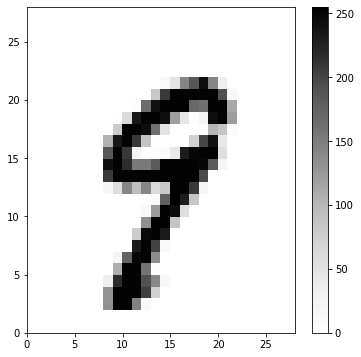

In [ ]:
img_label = rng.choice(train.label)
img = train[train['label'] == img_label].to_numpy()[0, 1:].reshape(28, 28)

plt.figure(figsize=(6, 6))
plt.pcolormesh(np.flip(img, 0), cmap = 'Greys')
plt.colorbar()

In [ ]:
train_x, train_y = train.to_numpy()[:, 1:] / 255, keras.utils.np_utils.to_categorical(train.label.values)
test_x, test_y = test.to_numpy()[:, :] / 255, None

In [ ]:
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [ ]:
train.label[split_size:]

29399    1
29400    3
29401    2
29402    7
29403    6
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 12601, dtype: int64

In [ ]:
# define vars
input_num_units = 784
hidden_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128


# create model
model = Sequential([
  Dense(input_num_units, activation='relu'),
  Dense(output_num_units, activation='softmax'),
])

# compile the model with necessary attributes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
trained_model = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Epoch 1/5
230/230 [==============================] - 4s 15ms/step - loss: 0.3345 - accuracy: 0.9018 - val_loss: 0.1699 - val_accuracy: 0.9521
Epoch 2/5
230/230 [==============================] - 3s 14ms/step - loss: 0.1376 - accuracy: 0.9604 - val_loss: 0.1294 - val_accuracy: 0.9617
Epoch 3/5
230/230 [==============================] - 3s 14ms/step - loss: 0.0869 - accuracy: 0.9744 - val_loss: 0.0990 - val_accuracy: 0.9698
Epoch 4/5
230/230 [==============================] - 3s 14ms/step - loss: 0.0591 - accuracy: 0.9836 - val_loss: 0.0945 - val_accuracy: 0.9698
Epoch 5/5
230/230 [==============================] - 3s 14ms/step - loss: 0.0408 - accuracy: 0.9888 - val_loss: 0.0877 - val_accuracy: 0.9729


Prediction is:  8


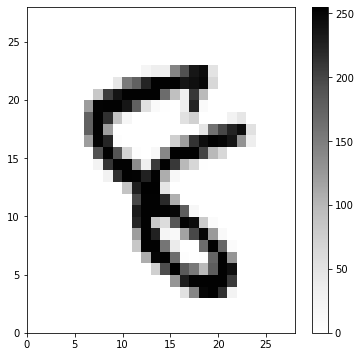

In [ ]:
index_choice = rng.choice(range(test.shape[0]))

img = test_x[index_choice, :]
img = img.reshape(1, 784)

result = [[i, j] for i, j in enumerate(model.predict(img).tolist()[0])]
result = sorted(result, key=lambda x: x[1], reverse=True)

print("Prediction is: ", result[0][0])

plt.figure(figsize=(6, 6))
plt.pcolormesh(np.flip(img.reshape(28, 28)*255, 0), cmap = 'Greys')
plt.colorbar()

In [ ]:
predicted_test = model.predict(test_x)

In [ ]:
label = []
file_array = []
for res in predicted_test[:10]:
  enum_res = [[i, j] for i, j in enumerate(res.tolist())]
  enum_res = sorted(enum_res, key=lambda x: x[1], reverse=True)
  label.append(enum_res[0][0])
  file_array.append(res)
submit = {'label': label, 'file_array': file_array}
submit = pd.DataFrame(submit)
submit.to_csv('/content/drive/MyDrive/Colab Notebooks/mnist recognition/sample_submission.csv', index=False)

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mnist recognition/sample_submission.csv')
sample_submission.head()

,label,file_array
0,2,[3.6861323e-07 2.5429955e-11 9.9999869e-01 4.4...
1,0,[9.9999273e-01 1.6886754e-09 7.3693386e-08 3.5...
2,9,[7.5633679e-06 1.7624923e-04 5.3742446e-04 1.4...
3,9,[1.1064166e-01 4.8893421e-06 2.6148630e-02 2.7...
4,3,[1.0560391e-06 2.6108706e-05 1.1152901e-03 9.9...


In [ ]:
# define vars
input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 25
batch_size = 128

model2 = Sequential([
 Dense(input_num_units, activation='relu'),
 Dropout(0.2),
 Dense(hidden1_num_units, activation='relu'),
 Dropout(0.2),
 Dense(hidden2_num_units, activation='relu'),
 Dropout(0.2),
 Dense(hidden3_num_units, activation='relu'),
 Dropout(0.2),
 Dense(hidden4_num_units, activation='relu'),
 Dropout(0.2),
 Dense(output_num_units, activation='softmax'),
])

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Epoch 1/25
329/329 [==============================] - 4s 13ms/step - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.0249 - val_accuracy: 0.9934
Epoch 2/25
329/329 [==============================] - 4s 13ms/step - loss: 0.0072 - accuracy: 0.9980 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 3/25
329/329 [==============================] - 4s 13ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0011 - val_accuracy: 0.9998
Epoch 4/25
329/329 [==============================] - 4s 13ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0060 - val_accuracy: 0.9983
Epoch 5/25
329/329 [==============================] - 4s 13ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 6/25
329/329 [==============================] - 4s 13ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0016 - val_accuracy: 0.9998
Epoch 7/25
329/329 [==============================] - 4s 13ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 7.3923e-04 - val_accuracy: 0.